In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#reading files into jupyter console
rounds2 = pd.read_csv('C:/Users/gupta/Downloads/UpGrad_AI_ML/Assignment/rounds2.csv', encoding = 'ISO-8859-1')
companies = pd.read_csv('C:/Users/gupta/Downloads/UpGrad_AI_ML/Assignment/companies.txt', sep = '\t', encoding = 'ISO-8859-1')


In [117]:
#unique companies present in rounds2
print('unique company name in "rounds2" df',rounds2.company_permalink.nunique())


#unique companies present in companies
print('unique company name in "companies" df',companies.name.nunique())

unique company name in "rounds2" df 90247
unique company name in "companies" df 66102


In [118]:
#In the companies data frame, which column can be used as the unique key for each company?
companies.permalink

0                                      /Organization/-Fame
1                                   /Organization/-Qounter
2                      /Organization/-The-One-Of-Them-Inc-
3                                    /Organization/0-6-Com
4                           /Organization/004-Technologies
5                         /Organization/01Games-Technology
6                      /Organization/0Ndine-Biomedical-Inc
7                                     /Organization/0Xdata
8                                          /Organization/1
9                                /Organization/1-2-3-Listo
10                                   /Organization/1-4-All
11                          /Organization/1-618-Technology
12                             /Organization/1-800-Dentist
13                             /Organization/1-800-Doctors
14                /Organization/1-800-Publicrelations-Inc-
15                              /Organization/1-Mainstream
16                                   /Organization/1-Of-

In [119]:
#Are there any companies in the rounds2 file which are not present in companies?
if rounds2.equals(companies):
    print('N')
else:
    print('Y')

Y


In [120]:
#converting all values in rounds2 and companies to lower case

rounds2['company_permalink']= rounds2['company_permalink'].apply(lambda x: x.lower())
companies['permalink']= companies['permalink'].apply(lambda x: x.lower())

In [121]:
#Merge the two data frames
master_frame = pd.merge(rounds2,companies, left_on='company_permalink', right_on='permalink', how='inner')

#How many observations are present in master_frame?
len(master_frame)

114942

In [122]:
#Cleaning the master_frame data 

In [123]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
dtype: int64

In [124]:
master_frame.isnull().any(axis = 0)

company_permalink          False
funding_round_permalink    False
funding_round_type         False
funding_round_code          True
funded_at                  False
raised_amount_usd           True
permalink                  False
name                        True
homepage_url                True
category_list               True
status                     False
country_code                True
state_code                  True
region                      True
city                        True
founded_at                  True
dtype: bool

In [125]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [126]:
#Removing funding_round_code column as missing values are greater than 70%
master_frame = master_frame.drop('funding_round_code', axis = 1)
master_frame.dropna(0)


round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [127]:
#counting the number of columns with more than 5 null values
len(master_frame[master_frame.isnull().sum(axis=1) > 5].index)

2825

In [128]:
#calculating the percentage of the values having null
100*(len(master_frame[master_frame.isnull().sum(axis=1) > 5].index) / len(master_frame.index))


2.4577613057020065

In [129]:
#retaining the rows having <= 5 Null 
master_frame = master_frame[master_frame.isnull().sum(axis = 1) <= 5]

round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          16.14
permalink                   0.00
name                        0.00
homepage_url                4.18
category_list               1.66
status                      0.00
country_code                5.24
state_code                  7.24
region                      6.54
city                        6.54
founded_at                 16.23
dtype: float64

In [130]:
master_frame.raised_amount_usd.isnull().sum()

18092

In [131]:
#keeping rows only with four funding_round_type values
master_frame = master_frame[(master_frame.funding_round_type == "venture") | 
        (master_frame.funding_round_type == "angel") | 
        (master_frame.funding_round_type == "seed") | 
        (master_frame.funding_round_type == "private_equity") ]

#removing NaN raised_amount_usd rows
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]

round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                3.50
category_list               0.75
status                      0.00
country_code                5.34
state_code                  7.28
region                      6.64
city                        6.63
founded_at                 15.91
dtype: float64

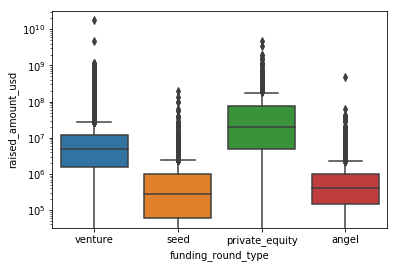

In [132]:
# comparing summary stats across four categories
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.show()

# checkpoint 2

In [133]:
#calculating mean for 4 types of funding_round_type
data_mean = round(master_frame.groupby('funding_round_type')['raised_amount_usd'].mean(),2)
print(data_mean)

funding_round_type
angel               959636.43
private_equity    73086734.51
seed                724314.80
venture           11720929.66
Name: raised_amount_usd, dtype: float64


In [134]:
#Based on the criteria of fund limit 5 to 15 million usd

#investment_type = data_mean[data_mean['funding_amount_type'] >= 500000 & data_mean['funding_amount_type'] <= 1500000]

# checkpoint 3

In [135]:
sorted_frame = master_frame.sort_values('raised_amount_usd',ascending=False)
#sorted_frame = sorted_frame.groupby('funding_round_type')

In [136]:
sorted_frame.groupby('country_code')

In [137]:
sorted_frame['country_code'].unique().tolist()


['USA',
 'CHN',
 'RUS',
 'IND',
 'KOR',
 nan,
 'GBR',
 'GRD',
 'NLD',
 'BRA',
 'JPN',
 'BMU',
 'SWE',
 'FRA',
 'IDN',
 'ESP',
 'DEU',
 'AUS',
 'SGP',
 'CAN',
 'NOR',
 'ZAF',
 'MYS',
 'TWN',
 'ARE',
 'LUX',
 'NZL',
 'CHE',
 'EGY',
 'ISR',
 'AUT',
 'NGA',
 'DNK',
 'KEN',
 'PHL',
 'FIN',
 'IRL',
 'BEL',
 'VNM',
 'MEX',
 'HKG',
 'CZE',
 'TUR',
 'CYM',
 'ITA',
 'PAK',
 'POL',
 'PRT',
 'MUS',
 'COL',
 'ARG',
 'ISL',
 'LTU',
 'CYP',
 'THA',
 'TAN',
 'ARM',
 'GHA',
 'KNA',
 'PAN',
 'MAF',
 'KWT',
 'GIB',
 'MNE',
 'MLT',
 'SVN',
 'CHL',
 'EST',
 'JOR',
 'URY',
 'BGR',
 'BAH',
 'HUN',
 'LIE',
 'KAZ',
 'LVA',
 'BGD',
 'ROM',
 'UKR',
 'GRC',
 'SVK',
 'TTO',
 'GGY',
 'TUN',
 'SRB',
 'SEN',
 'NIC',
 'UGA',
 'LAO',
 'PER',
 'SOM',
 'MAR',
 'LBN',
 'BWA',
 'BRB',
 'IRN',
 'HRV',
 'PRI',
 'JAM',
 'ECU',
 'MCO',
 'SAU',
 'ZMB',
 'MMR',
 'CRI',
 'KHM',
 'VEN',
 'DZA',
 'BLM',
 'BHR',
 'GTM',
 'DOM',
 'CMR',
 'NPL',
 'SLV',
 'AZE',
 'QAT',
 'ALB',
 'RWA',
 'DMA',
 'UZB',
 'BLR',
 'CIV',
 'MDA',
 'MKD',
 '

# checkpoint 4

In [138]:
#adding column primary sector in our dataframe
list1 = companies['category_list'].str.split('|',n = 1,expand = True)
master_frame['primary_sector'] = list1[0]

In [139]:
mapping = pd.read_csv(r'C:\Users\gupta\Downloads\UpGrad_AI_ML\Assignment\mapping.csv')

In [140]:
#reverse encoding the mapping file and adding as main sector
def reverse_encoding(x):
    for i in mapping.columns:
        if x[i] == 1:
            return i

In [141]:
master_frame['main_sector'] = mapping.apply(reverse_encoding, axis = 1)

# checkpoint 5

In [ ]:
D1 = 

In [147]:
import sys

os.getcwd()

NameError: name 'os' is not defined